5-19-20
Cal Craven
Take the center of mass xyz files created, and calculate neighbor statistics. Do finishing calculations as well
1. Read in data from each directory
2. Calculate coordination number 
3. Save statepoint and coordination number to a data frame
4. Plots for analysis
5. Import sasa data and add to a single dataframe
6. heatmap plotting

In [1]:
import numpy as np
import math
import freud
import matplotlib.pyplot as plt
import pandas
import os.path as path
import scipy
from readtraj import *
from collections import Counter
from plotting import *

# Section 1: Read in COM trajectory data from .xyz files in workspace

In [2]:
index=0
scale=0.395
box_length=101.26605*scale
data=XYZ_To_NParray("../1bb21ced4538fec0a1744ab973600ca0/COG.xyz")*scale 
#create a frame totalX25X3 array of particles
data1 = XYZ_To_NParray('../88654cf966042dfcd059a45527c3fe8b/COG.xyz')*scale
data2 = XYZ_To_NParray('../ef19c3b8bdcd0a4b572e3a4916cc78bb/COG.xyz')*scale

# Section 2: Calculate coordination_number for a single system

Plot an RDF for a single simulation
Use Freud function to plot rdf

In [3]:
pos_arr = Wrap_data(data,box_length)
pos_arr1 = Wrap_data(data1,box_length)
pos_arr2 = Wrap_data(data2,box_length)

1167.2317
1856.5967
979.5395


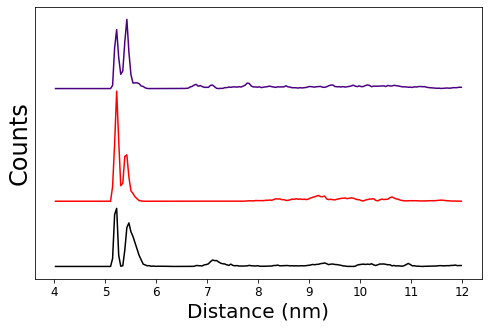

In [4]:
#data.shape[0] is the total number of frames
box=freud.box.Box.from_box([box_length, box_length, box_length])

ax,rdf,counts,prop=plot_rdf(pos_arr,'rdf',box)
ax1,rdf1,counts1,prop1=plot_rdf(pos_arr1,'rdf',box)
ax2,rdf2,counts2,prop2=plot_rdf(pos_arr2,'rdf',box)

offset1x=np.ones(len(rdf1.bin_centers))
offset2x=np.ones(len(rdf2.bin_centers))
offset1y=np.ones(len(getattr(rdf1, prop1)))
offset2y=np.ones(len(getattr(rdf2, prop2)))

fig,axs= plt.subplots(1,1,figsize=(8,5))
axs.plot(rdf.bin_centers, counts+offset2y*3000,c='indigo',label='Stringy')
axs.plot(rdf1.bin_centers+offset1x*0, counts1+offset1y*1100,c='red',label='Aggregated')
axs.plot(rdf2.bin_centers+offset2x*0, counts2+offset2y*0,c='k',label='Dispersed')
#plt.plot(bin_center,counts0,ls='-',c='k',label='Dispersed')
#plt.plot(bin_center,counts1,ls='--',c='indigo',label='Stringy')
#plt.plot(bin_center,counts2,ls=':',c='red',label='Aggregated')
axs.set_xlabel('Distance (nm)',fontsize=20)
axs.tick_params(labelsize=12)
axs.set_ylabel('Counts', fontsize=24)
axs.set_yticks(ticks=[])
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

plt.show()


Use a noise filter to make the rdf clearer to read

This code doesn't work below yet.
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.plot(np.linspace(0,20,1000).reshape(1000,),savitzky_golay(rdf.rdf,11,3))

Calculate Coordination Numbers for single simulation

Text(0, 0.5, 'Counts')

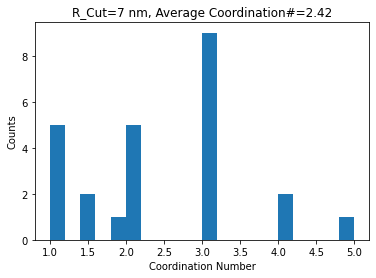

In [5]:
#Calculate the coordination number of all the particles in a single trajectory
#Use different read in values for data to take a look
r_cut=7
wrapped_data=Wrap_data(data1,box_length)
dis = Calc_Coordnum(wrapped_data,r_cut)
plt.hist(dis,bins=20)
plt.title('R_Cut=%1d nm, Average Coordination#=%1.2f' % (r_cut,np.average(dis)))
plt.xlabel('Coordination Number')
plt.ylabel('Counts')

# Section 3: Calculate Coord number for all simulations

In [6]:
#Calculate coord_num array. distance used is 18.3 nm (soft neighbor)
coord_num=np.zeros((44))
file_names=[]
sim_num=0
r_cut=7
scale=0.395
std_arr=np.zeros((44))
with open ('file_list','r') as directories:
    directory_list=directories.readlines()
    for file in directory_list:
        dcdpath= "../" + file[0:-1] + 'assemble.dcd'
        if not path.exists(dcdpath):
            continue 
        file_names.append(file[0:-1])
        data=(XYZ_To_NParray("../" + file[0:-1] + 'COG.xyz'))*scale
        neighbor_arr = Calc_Coordnum(Wrap_data(data,box_length),r_cut)
        coord_num[sim_num]=np.average(neighbor_arr)
        std_arr[sim_num]=np.std(neighbor_arr)
        sim_num+=1
        print('%1.2f done' % ((sim_num)/44))

0.02 done
0.05 done
0.07 done
0.09 done
0.11 done
0.14 done
0.16 done
0.18 done
0.20 done
0.23 done
0.25 done
0.27 done
0.30 done
0.32 done
0.34 done
0.36 done
0.39 done
0.41 done
0.43 done
0.45 done
0.48 done
0.50 done
0.52 done
0.55 done
0.57 done
0.59 done
0.61 done
0.64 done
0.66 done
0.68 done
0.70 done
0.73 done
0.75 done
0.77 done
0.80 done
0.82 done
0.84 done
0.86 done
0.89 done
0.91 done
0.93 done
0.95 done
0.98 done
1.00 done


Text(0, 0.5, 'Counts')

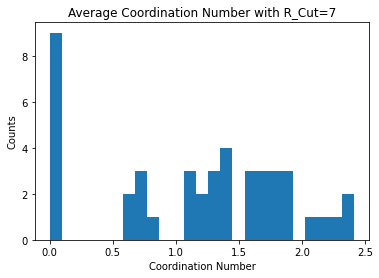

In [7]:
#Plot histogram of the coordination numbers for all simulations done
plt.hist(coord_num,bins=25)
plt.title('Average Coordination Number with R_Cut=' + str(r_cut))
plt.xlabel('Coordination Number')
plt.ylabel('Counts')

# Section 4: Read in Statepoints

In [8]:
sim_num=0
chainlength=np.zeros((44))
chaindensity=np.zeros((44))
fsa=np.zeros((44))
with open ('file_list','r') as directories:
    directory_list=directories.readlines()
    for file in directory_list:
        dcdpath= "../" + file[0:-1] + 'assemble.dcd'
        if not path.exists(dcdpath):
            continue 
        
        with open("../" + file[0:-1] +"signac_statepoint.json","r") as file:
            statepoints = file.readlines()
            chainlength[sim_num]=int(statepoints[1][17:19])
            chaindensity[sim_num]=float(statepoints[2][19:22])
            fsa[sim_num]=float(statepoints[7][9:13])
            
        sim_num+=1

In [9]:
for index in np.arange(0,43,1):
    print(index,coord_num[index])
    print(file_names[index])
    print(fsa[index],chainlength[index],chaindensity[index],'\n')

0 1.9144554455445542
1499538af491ce89bbfed0de287077ee/
0.65 18.0 4.0 

1 0.6835643564356437
14a2b8b463e21ae1954f5a1c617847e2/
0.55 30.0 3.0 

2 2.331881188118812
1bb21ced4538fec0a1744ab973600ca0/
0.55 18.0 2.5 

3 1.3845544554455447
1bd06d14f87674a7d263b6ea42872fb9/
0.45 18.0 4.0 

4 0.6677227722772276
270c0867ad60b13942fa6ae00f91bf96/
0.45 24.0 3.5 

5 1.3354455445544553
2786e7ea28a7e59e2e50ff5e580c7d3e/
0.55 21.0 4.5 

6 0.0
2c8bf79a2c578f2bec76c078865b4132/
0.25 18.0 3.5 

7 1.92
33c0d152f8ff745cc703b13fe4967842/
0.55 18.0 3.5 

8 1.3964356435643566
3688f57faae97574bce28b1c7ff935bd/
0.35 18.0 3.0 

9 0.7239603960396039
3719d43c55829a655347311220b2d273/
0.65 33.0 3.5 

10 1.2926732673267327
46d076c0ba37bdefdfa286d61e4aaa20/
0.35 18.0 3.5 

11 0.030099009900990098
4e58830be1dccdf9c2b856c589273904/
0.27 18.0 3.0 

12 0.020594059405940595
50576410dd0dfb272b45f35be32e0118/
0.35 18.0 4.5 

13 1.1405940594059405
5a3d11f1fd9ab9924c570969af138c29/
0.55 24.0 4.0 

14 0.0
5e5469e3ad539a2a44caf

In [9]:
df_single_np = pandas.read_csv('Single_Tether_Data.csv')
df_rg_asphere = pandas.read_csv('rg_asphere.csv')

# Section 5: Save all data to a dataframe
id, chainlength, chaindensity, fsa, coord num, coord std, sasa, phase

In [12]:
# determine phase

In [10]:
phase=np.zeros((np.shape(coord_num)))
for i,coord in enumerate(coord_num):
    if coord<=1.0:
        phase[i]=0
    elif coord<=2.0 and std_arr[i]<=1.0:
        phase[i]=1
    else:
        phase[i]=2
print(phase)

[1. 0. 2. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 2. 2.
 1. 1. 1. 0. 1. 2. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 2. 1. 0.]


In [11]:
dict = {'ID' : file_names,
       'Chain_length' : chainlength,
        'Chain_density' : chaindensity,
        'fsa' : fsa,
        'Coordination_number' : coord_num,
        'Standard_deviation' : std_arr,
        'Phase' : phase
       }
df_TNP_only = pandas.DataFrame(dict)

In [12]:
#combine all the single particle and full system data into one panda df
indices_arr= []
for i,j in enumerate(df_TNP_only['fsa']):
    indices_arr.append(np.where(
        np.all([df_TNP_only['fsa'][i] == np.round(df_single_np['fsa'].ravel(),
                                                                decimals=2), 
                df_TNP_only['Chain_density'][i] == np.round(df_single_np['chain_density'].ravel(),
                                                                decimals=2), 
                df_TNP_only['Chain_length'][i] == np.round(df_single_np['chainlength'].ravel(),
                                                                decimals=2)],
                axis=0))[0])

full_sasa_arr=np.zeros(len(indices_arr))
full_rg_arr=np.zeros(len(indices_arr))
full_asphere_arr=np.zeros(len(indices_arr))
for i,index in enumerate(indices_arr):    
    if index:
        full_sasa_arr[i] = (np.take(df_single_np['sasa'].ravel(), index, axis=0))
        full_rg_arr[i] = (np.take(df_rg_asphere['Radius of Gyration (nm)'].ravel(), index, axis=0))
        full_asphere_arr[i] = (np.take(df_rg_asphere['Asphericity'].ravel(), index, axis=0))

/Users/calcraven/miniconda3/envs/simulation36/lib/python3.6/site-packages/ipykernel_launcher.py:17: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


# Plot Phases vs Statepoints

In [13]:
dict = {'ID' : file_names,
       'Chain_length' : chainlength,
        'Chain_density' : chaindensity,
        'fsa' : fsa,
        'Coordination_number' : coord_num,
        'Standard_deviation' : std_arr,
        'Phase' : phase,
        'sasa' : full_sasa_arr,
        'Gyration' : full_rg_arr,
        'Asphericity' : full_asphere_arr
       }
df = pandas.DataFrame(dict)

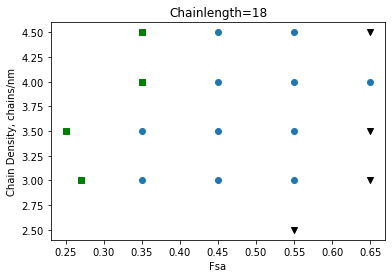

In [14]:
Plot_Fixed_Cl(df,18)

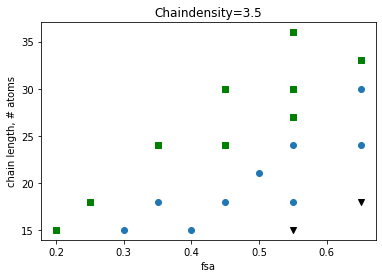

In [15]:
Plot_Fixed_Cd(df,3.5)

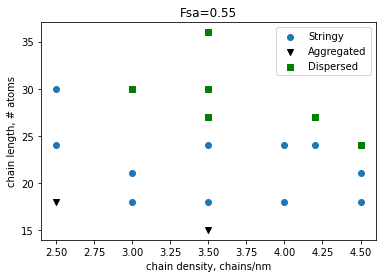

In [16]:
Plot_Fixed_Fsa(df,0.55)

Heat maps for SASA

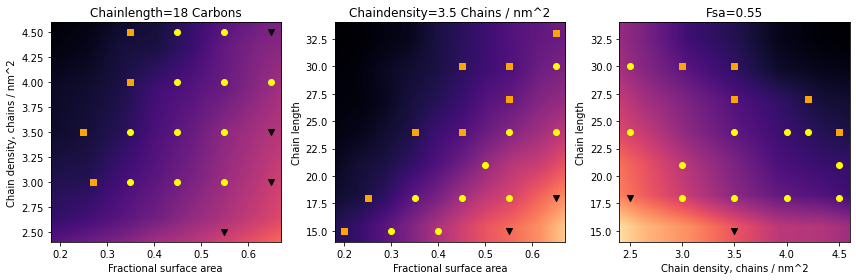

In [17]:
chainlength = df_single_np['chainlength'].unique()
chainlength.sort()
chain_density = df_single_np['chain_density'].unique()
chain_density.sort()
fsa = df_single_np['fsa'].unique()
fsa.sort()
Plot_Heatmaps(chainlength,chain_density,fsa,df_single_np,df)

#only need this for csv
for i,value in enumerate(df['sasa']):
    if not value:
        df['sasa'][i]='N/A'

df.to_csv('Tethered_Nanoparticle_statepoints_sasa_coord_data')

# Section : Sasa vs Phase Histograms

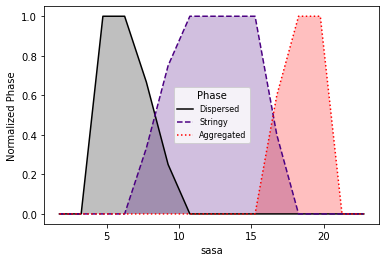

In [27]:
bins = create_bins(lower_bound=1,
                   width=1.5,
                   quantity=15) 
total_counts=Total_Counts(df,bins,'sasa')
bin_center = []
for bin in bins:
    center = (bin[0]+bin[1])/2
    bin_center.append(center)
counts0 = Plot_Phase(df,0,total_counts,bins,'sasa',in_place=False)
counts1 = Plot_Phase(df,1,total_counts,bins,'sasa',in_place=False)
counts2 = Plot_Phase(df,2,total_counts,bins,'sasa',in_place=False)
Plot_All_Phases('sasa',df,bins)

Get a plot of FSA vs Phase to compare to SASA

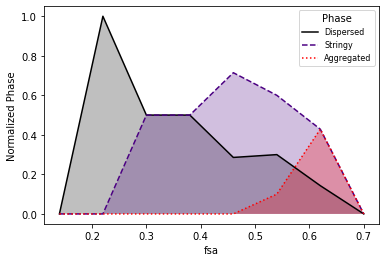

In [29]:
bins = create_bins(lower_bound=0.1,
                   width=0.08,
                   quantity=8) 
Plot_All_Phases('fsa',df,bins)

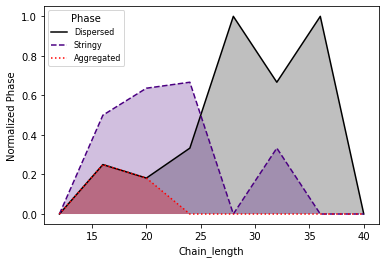

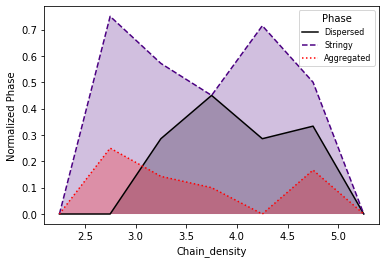

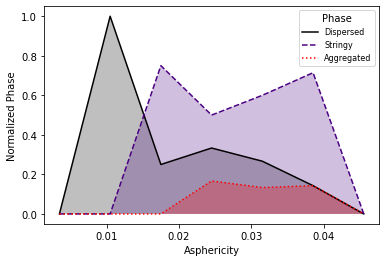

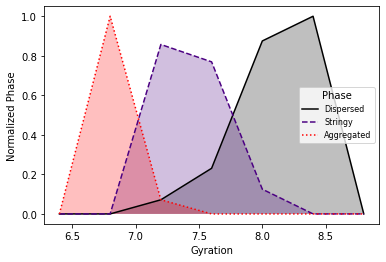

In [43]:
attributes = ['Chain_length', 'Chain_density', 'Asphericity','Gyration']
bins=[]
for size in [[10,4,8],[2,.5,7],[0,0.007,7],[6.2,.4,7]]:
    bins.append(create_bins(lower_bound=size[0],width=size[1],quantity=size[2]))
    
for i,attribute in enumerate(attributes):
    Plot_All_Phases(attribute,df,bins[i])

# Calculate Radius of Gyration and Asphericity

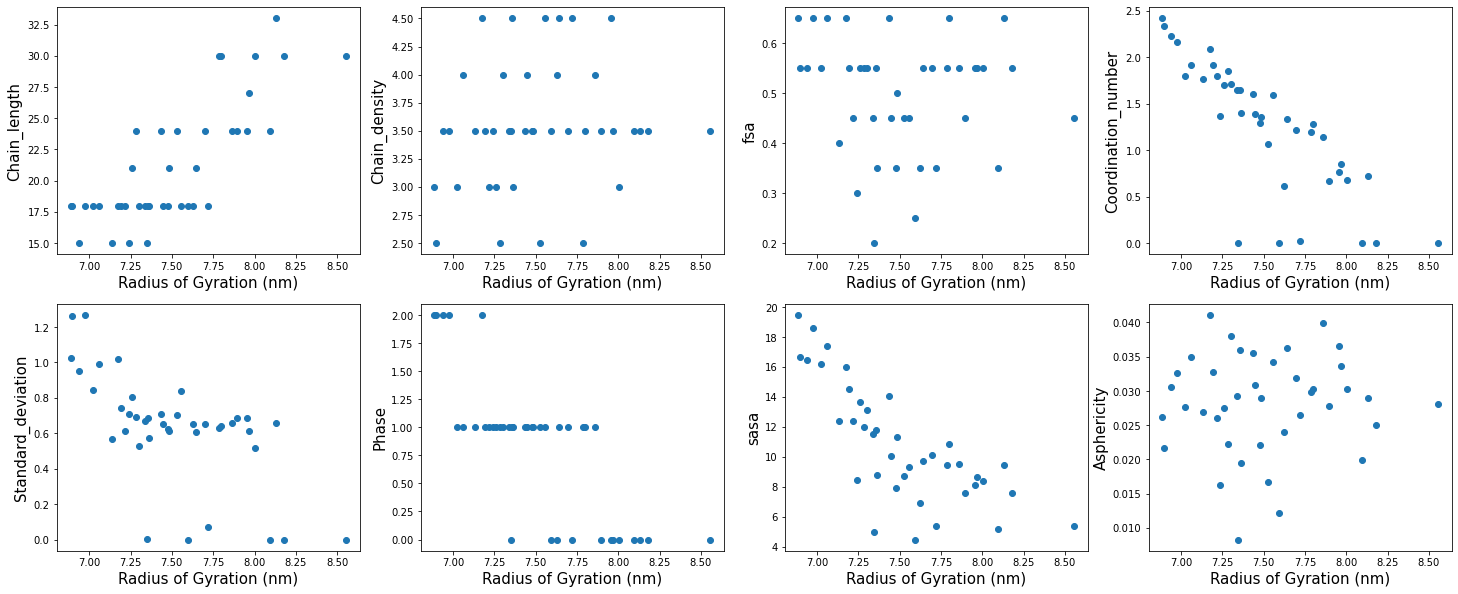

In [184]:
length = len(df.axes[1])
figs,axs = plt.subplots(2,4,figsize=(25,10))
for j in [0,1]:
    for i in [0,1,2,3]:
        attribute = df.drop('Gyration', axis=1).axes[1][i+j*4+1]
        axs[j][i].scatter(df[(df['Gyration']>0)]['Gyration'].values,
                        df[(df['Gyration']>0)][attribute].values)
        axs[j][i].set_ylabel(attribute,fontsize=15)
        axs[j][i].set_xlabel('Radius of Gyration (nm)',fontsize=15)

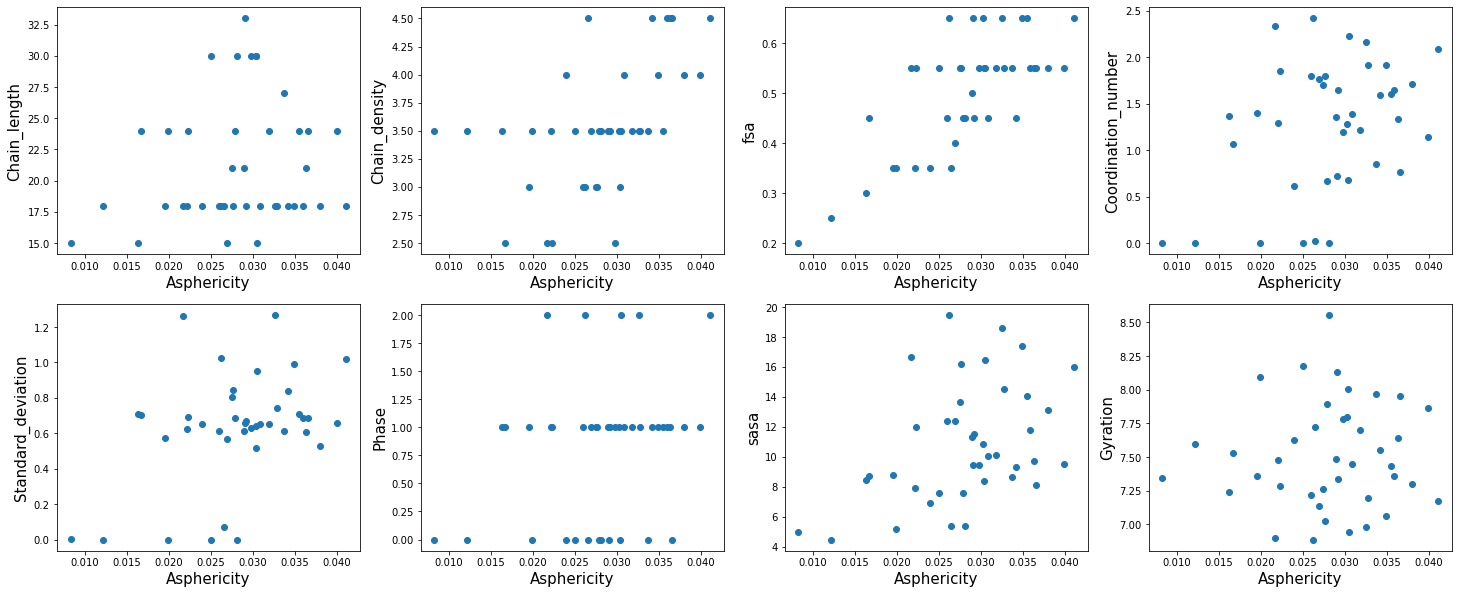

In [185]:
length = len(df.axes[1])
figs,axs = plt.subplots(2,4,figsize=(25,10))
for j in [0,1]:
    for i in [0,1,2,3]:
        attribute = df.drop('Asphericity', axis=1).axes[1][i+j*4+1]
        axs[j][i].scatter(df[(df['Asphericity']>0)]['Asphericity'].values,
                        df[(df['Asphericity']>0)][attribute].values)
        axs[j][i].set_ylabel(attribute,fontsize=15)
        axs[j][i].set_xlabel('Asphericity',fontsize=15)